# Regression - Multiple Linear Regression

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#import all the initial packages

import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [4]:
#import csv file

con_data = pd.read_excel("Concrete_Data.xls")
cdf_data = con_data.iloc[:, 0:9]
cdf_data

,Cement,Blast Furnace Slag ),Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.698299
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790


In [5]:
# list the column names

list(cdf_data.columns.values)



['Cement ',
 'Blast Furnace Slag )',
 'Fly Ash ',
 'Water  ',
 'Superplasticizer ',
 'Coarse Aggregate  ',
 'Fine Aggregate ',
 'Age (day)',
 'Concrete compressive strength']

In [6]:
#As the column names conatains spaces and some extra characters removing them and restoring column names

cdf_data = cdf_data.rename(columns = {'Cement ' : 'Cement', 'Blast Furnace Slag )' : "Blast_Furnace_Slag" ,
                                     'Fly Ash ': 'Fly_Ash' , 'Water  ' : 'Water' ,'Superplasticizer ' : 'Superplasticizer' ,
                                     'Coarse Aggregate  ' : 'Coarse_Aggregate' , 'Fine Aggregate ' : 'Fine_Aggregate' ,
                                     'Age (day)' : 'Age_day' , 'Concrete compressive strength' : 'strength'})

list(cdf_data.columns.values)



type(cdf_data)

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age_day',
 'strength']

pandas.core.frame.DataFrame

Text(0.5, 0, 'Cement')

Text(0, 0.5, 'Strength')

Text(0.5, 0, 'Water')

Text(0, 0.5, 'Strength')

Text(0.5, 0, 'Blast_Furnace_Slag')

Text(0, 0.5, 'Strength')

Text(0.5, 0, 'Fly_Ash')

Text(0, 0.5, 'Strength')

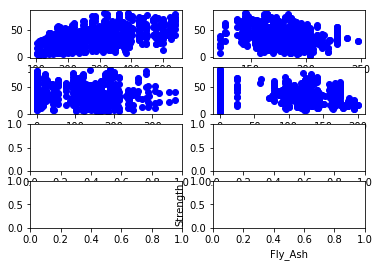

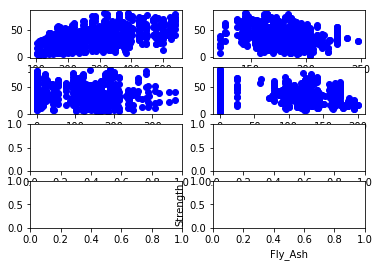

In [7]:
# scatter plot to see which variables are lineary related.

fig , ax2 = plt.subplots(4,2)

ax2[0,0].scatter(cdf_data.Cement, cdf_data.strength,  color='blue')
plt.xlabel("Cement")
plt.ylabel("Strength")


ax2[0,1].scatter(cdf_data.Water, cdf_data.strength,  color='blue')
plt.xlabel("Water")
plt.ylabel("Strength")


ax2[1,0].scatter(cdf_data.Blast_Furnace_Slag, cdf_data.strength,  color='blue')
plt.xlabel("Blast_Furnace_Slag")
plt.ylabel("Strength")

ax2[1,1].scatter(cdf_data.Fly_Ash, cdf_data.strength,  color='blue')
plt.xlabel("Fly_Ash")
plt.ylabel("Strength")

#can draw all the var plot
fig


In [8]:
#Define Independent(x) and Dependent (y)  varaibles from the above dataset

x = cdf_data[['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age_day']]

y = cdf_data["strength"]



In [9]:
#Import train_test_split from sklearn model selection to split the data inot train ansd test

from sklearn.model_selection import train_test_split




In [10]:
# Spilt the Data

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, 
                                                    random_state= 100 
                                                    )

In [11]:
# impprt linear_model from sklearn to perform linear model

from sklearn import linear_model as lm



In [12]:
# Create model object for linear regression

mlr = lm.LinearRegression()

In [13]:
#fit the model

mlr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
# Predict the values by passing the test data

predictvalues = mlr.predict(x_test)
predictvalues

array([61.13991029, 53.62654301, 22.27703886, 27.86499794, 51.58813106,
       18.42553155, 30.35521735, 24.30231014, 28.72875626, 22.25470959,
       35.70098089, 28.41334794, 57.20459825, 35.02987948, 53.5720035 ,
       31.86016483, 60.52413181, 33.60451995, 61.19935836, 39.58474394,
       41.73570448, 25.02667375, 46.91707853, 16.19579956, 70.39274262,
       48.72094029, 38.44064487, 37.89874444, 37.70159933, 27.95522675,
       29.12583751, 19.27587137, 51.0531937 , 34.66711546, 60.40158381,
       27.91797041, 48.57531073, 36.53333977, 30.6739956 , 24.49310139,
       29.62375716, 25.88552946, 39.49991895, 35.84931378, 39.70946661,
       42.94192811, 31.96935211, 29.55369009, 25.80061636, 49.70723814,
       25.28612032, 43.1743375 , 54.14031565, 27.06164707, 54.30719339,
       57.19217398, 32.2046812 , 24.57608031, 15.01084734, 34.13740003,
       54.62576032, 22.69151986, 16.01847418, 31.40902852, 56.83595283,
       60.40158381, 50.8547782 , 28.41047795, 47.32074101, 29.05

In [15]:
# Retriving Coefficient values

mlr.coef_

array([ 0.12412584,  0.10364144,  0.09337278, -0.13472684,  0.28645156,
        0.02059513,  0.02558215,  0.11462178])

In [16]:
# import MSE , MAE amd R2 from sklearn metrics to clculate the same

from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

print('Mean Absolute Error:', mean_absolute_error(y_test, predictvalues)) 
print('Mean Squared Error:', mean_squared_error(predictvalues, y_test))
print('Root Mean Squared Error: ', r2_score(predictvalues, y_test))




Mean Absolute Error: 8.262809860471013
Mean Squared Error: 113.18587901153971
Root Mean Squared Error:  0.39252228777875064
